In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [3]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-06-10.csv')
df

fips                    county_name      state            division  \
0      1131         Wilcox County, Alabama    Alabama  East South Central   
1      1129     Washington County, Alabama    Alabama  East South Central   
2      1133        Winston County, Alabama    Alabama  East South Central   
3      1127         Walker County, Alabama    Alabama  East South Central   
4      1125     Tuscaloosa County, Alabama    Alabama  East South Central   
...     ...                            ...        ...                 ...   
3106  55079    Milwaukee County, Wisconsin  Wisconsin  East North Central   
3107  55121  Trempealeau County, Wisconsin  Wisconsin  East North Central   
3108  56001         Albany County, Wyoming    Wyoming            Mountain   
3109  55067     Langlade County, Wisconsin  Wisconsin  East North Central   
3110  55099        Price County, Wisconsin  Wisconsin  East North Central   

       region  vaccine_hesitant  vaccine_hesitant_strong  \
0       South              0.23                     0.11   
1       South              0.23                     0.11   
2       South              0.22                     0.11   
3       South              0.23                     0.11   
4       South              0.22                     0.10   
...       ...               ...                      ...   
3106  Midwest              0.18                     0.11   
3107  Midwest              0.18                     0.10   
3108     West              0.30                     0.16   
3109  Midwest              0.17                     0.10   
3110  Midwest              0.17                     0.10   

     vaccine_hesitant_category  social_vulnerability_index  \
0                       Medium                        0.93   
1                       Medium                        0.73   
2                       Medium                        0.70   
3                       Medium                        0.75   
4                       Medium                        0.63   
...                        ...                         ...   
3106                    Medium                        0.81   
3107                    Medium                        0.28   
3108                      High                        0.25   
3109                    Medium                        0.35   
3110                    Medium                        0.16   

      ethnicity_hispanic  ...  election_total_2012  election_dem_2012  \
0                 0.0053  ...                 6547               4867   
1                 0.0146  ...                 8761               2971   
2                 0.0315  ...                 9712               1286   
3                 0.0249  ...                28497               6551   
4                 0.0372  ...                78495              32003   
...                  ...  ...                  ...                ...   
3106              0.1500  ...               490944             328090   
3107              0.0840  ...                13456               7601   
3108              0.0953  ...                16052               7445   
3109              0.0197  ...                10482               4569   
3110              0.0177  ...                 7870               3882   

      election_gop_2012  election_oth_2012  election_total_2016  \
0                  1676                  4                 6095   
1                  5749                 41                 8492   
2                  8310                116                10255   
3                 21633                313                29243   
4                 45703                789                81708   
...                 ...                ...                  ...   
3106             158430               4424               434970   
3107               5703                152                13581   
3108               7851                756                16420   
3109               5810                103                10093   
31

In [4]:
# TODO: Bar charts (univariate) to explore vaccine hesitancy cluster groups along demographic data
# TODO: Scatterplots and heatmaps to visualize correlations between vaccine hesitancy and demographic variables
# TODO: Choropleth maps to visualize geographical county level data of vaccine hesitancy and demographic variables.
# TODO: Box plot graphs on vaccine hesitancy rates to look at distribution and find out cut off values for groupings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   fips                          3111 non-null   int64  
 1   county_name                   3111 non-null   object 
 2   state                         3111 non-null   object 
 3   division                      3044 non-null   object 
 4   region                        3044 non-null   object 
 5   vaccine_hesitant              3111 non-null   float64
 6   vaccine_hesitant_strong       3111 non-null   float64
 7   vaccine_hesitant_category     3111 non-null   object 
 8   social_vulnerability_index    3110 non-null   float64
 9   ethnicity_hispanic            3111 non-null   float64
 10  ethnicity_native              3111 non-null   float64
 11  ethnicity_asian               3111 non-null   float64
 12  ethnicity_black               3111 non-null   float64
 13  eth

## Vaccine Hesitancy

In [124]:
df['vaccine_hesitant'].describe()

count    3111.000000
mean        0.194744
std         0.046197
min         0.060000
25%         0.170000
50%         0.190000
75%         0.220000
max         0.320000
Name: vaccine_hesitant, dtype: float64

Our vaccine hesitant mean, median and standard deviation are:  0.19474445515911284 ,  0.19  and  0.046197436775025455


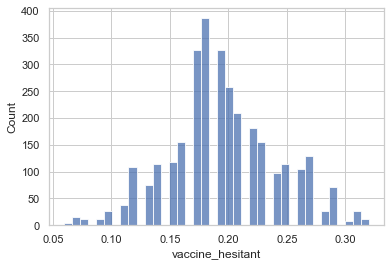

In [19]:
vaccine_hesitant_histogram = sns.histplot(data=df, x='vaccine_hesitant')
# TODO: Find out reason for missing columns, discuss slight right skew (median < mean)

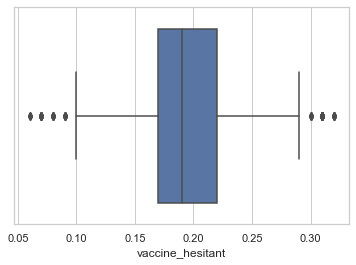

In [15]:
vaccine_hesitant_boxplot = sns.boxplot(x=df['vaccine_hesitant'])

In [125]:
df['vaccine_hesitant_strong'].describe()

count    3111.000000
mean        0.092086
std         0.029398
min         0.020000
25%         0.070000
50%         0.090000
75%         0.110000
max         0.200000
Name: vaccine_hesitant_strong, dtype: float64

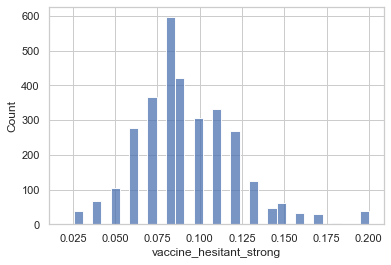

In [109]:
vaccine_hesitant_strong_histogram = sns.histplot(data=df, x='vaccine_hesitant_strong')

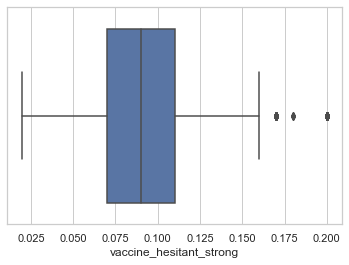

In [110]:
vaccine_hesitant_strong_boxplot = sns.boxplot(x=df['vaccine_hesitant_strong'])

## Ethnicity



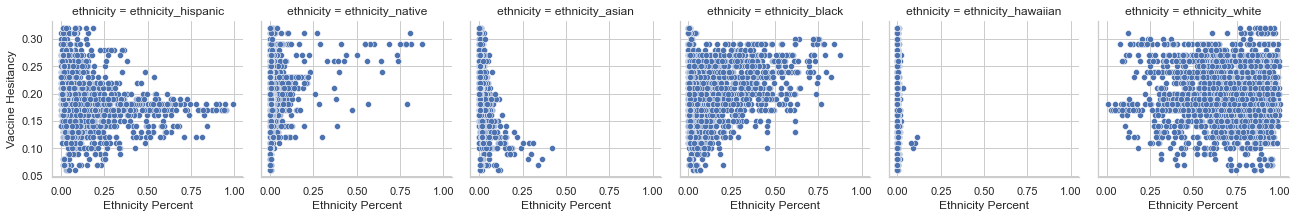

In [96]:
df_narrow_ethnicity = df.melt(id_vars=['vaccine_hesitant'], value_vars=['ethnicity_hispanic', 'ethnicity_native', 'ethnicity_asian', 'ethnicity_black', 'ethnicity_hawaiian', 'ethnicity_white'], var_name='ethnicity')
graph = sns.FacetGrid(df_narrow_ethnicity, col='ethnicity')
graph.map_dataframe(sns.scatterplot, x='value', y='vaccine_hesitant')
graph.set_axis_labels("Ethnicity Percent", "Vaccine Hesitancy")
# TODO: Figure out better way to visualize. Group dots into larger points?

## Geography

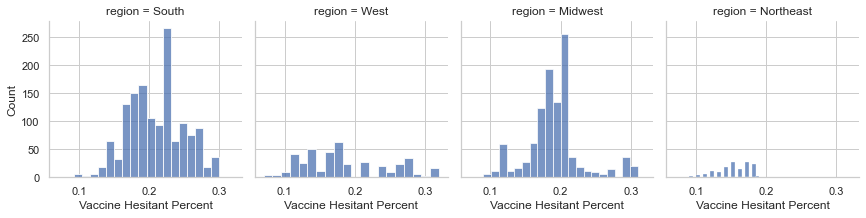

In [103]:
graph = sns.FacetGrid(df, col='region')
graph.map_dataframe(sns.histplot, x='vaccine_hesitant', bins=20)
graph.set_axis_labels("Vaccine Hesitant Percent", "Count")

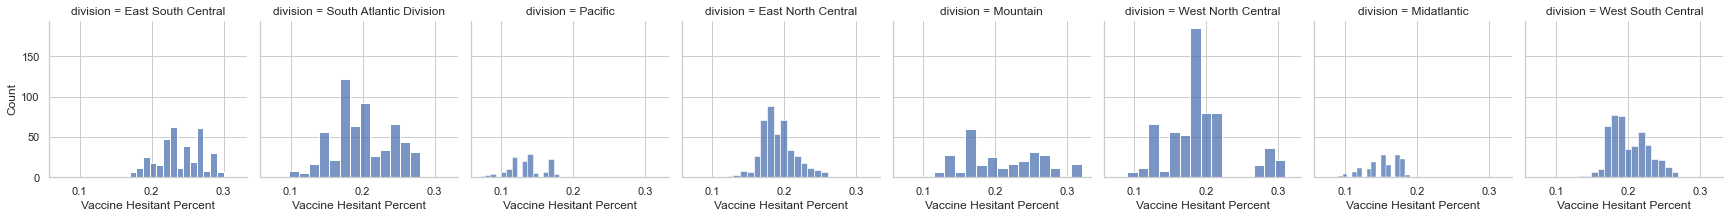

In [107]:
graph = sns.FacetGrid(df, col='division')
graph.map_dataframe(sns.histplot, x='vaccine_hesitant', bins=15)
graph.set_axis_labels("Vaccine Hesitant Percent", "Count")

(0.0, 0.3)

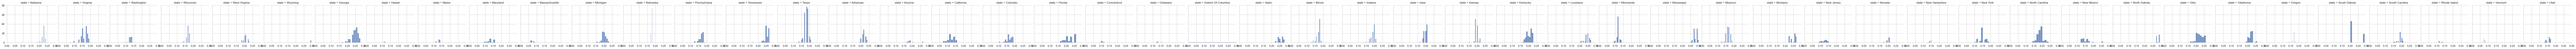

In [120]:
graph = sns.FacetGrid(df, col='state')
graph.map_dataframe(sns.histplot, x='vaccine_hesitant')
# TODO: fix x limits, add rows
plt.xlim(0, 0.3)

<AxesSubplot:xlabel='rural_urban_code', ylabel='vaccine_hesitant'>

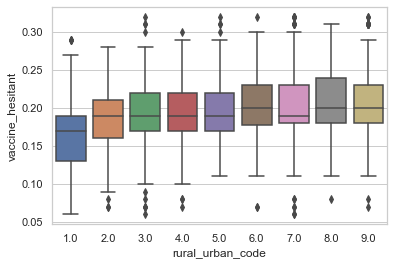

In [13]:
sns.boxplot(x=df['rural_urban_code'], y=df['vaccine_hesitant'])

<AxesSubplot:xlabel='population', ylabel='vaccine_hesitant'>

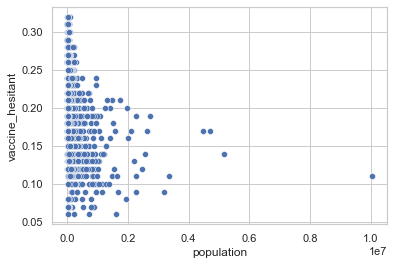

In [7]:
sns.scatterplot(x=df['population'], y=df['vaccine_hesitant'])

## Birth Rate

<AxesSubplot:xlabel='birth_rate', ylabel='vaccine_hesitant'>

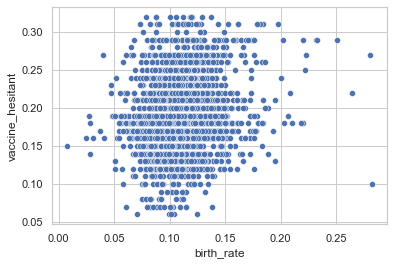

In [108]:
sns.scatterplot(x=df['birth_rate'], y=df['vaccine_hesitant'])